In [20]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3
import re
import math
from v_finite_polygons import voronoi_finite_polygons_2d
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Polygon, Patch
import matplotlib.image as mpimg
from matplotlib.ticker import ScalarFormatter

In [21]:
InteriorSensors = {
    'S-01':[3.5,5],
    'S-02':[2,5],
    'S-03':[3.5,6.5],
    'S-04':[3.5,5.1],
    'S-05':[3.5,3.5],
    'S-06':[5,5],
    'S-07':[1,9.9],
    'S-08':[1,10],
    'S-09':[10-.1,10],
    'S-10':[10,10],
    'S-11':[10,1.1],
    'S-12':[10,1],
    'S-13':[1,1.1],
    'S-15':[1,1],
}

In [22]:
os.getcwd()

'c:\\Users\\RobertRochlin\\Documents\\UW\\covidDataProject\\UWMed4-19'

In [23]:
allFiles = glob.glob("./interpolatedData/*.csv")
print(allFiles)

['./interpolatedData\\S-01.csv', './interpolatedData\\S-02.csv', './interpolatedData\\S-03.csv', './interpolatedData\\S-04.csv', './interpolatedData\\S-05.csv', './interpolatedData\\S-06.csv', './interpolatedData\\S-07.csv', './interpolatedData\\S-08.csv', './interpolatedData\\S-09.csv', './interpolatedData\\S-10.csv', './interpolatedData\\S-11.csv', './interpolatedData\\S-12.csv', './interpolatedData\\S-13.csv', './interpolatedData\\S-14.csv', './interpolatedData\\S-15.csv', './interpolatedData\\S-16.csv', './interpolatedData\\S-18.csv', './interpolatedData\\S-19.csv']


In [24]:
avgData = glob.glob("./stretchedAvgData/*.csv")
print(avgData)

['./stretchedAvgData\\OR 12 Blocked.csv', './stretchedAvgData\\OR 12 Unblocked.csv', './stretchedAvgData\\OR 5 Blocked.csv', './stretchedAvgData\\OR 5 Unblocked.csv']


In [25]:
expData = glob.glob("./stretchedExpirementData/*.csv")
print(expData)

['./stretchedExpirementData\\OR 12 Blocked Exp 1.csv', './stretchedExpirementData\\OR 12 Blocked Exp 2.csv', './stretchedExpirementData\\OR 12 Blocked Exp 3.csv', './stretchedExpirementData\\OR 12 Unblocked Exp 1.csv', './stretchedExpirementData\\OR 12 Unblocked Exp 2.csv', './stretchedExpirementData\\OR 12 Unblocked Exp 3.csv', './stretchedExpirementData\\OR 5 Blocked Exp 1.csv', './stretchedExpirementData\\OR 5 Blocked Exp 2.csv', './stretchedExpirementData\\OR 5 Blocked Exp 3.csv', './stretchedExpirementData\\OR 5 Unblocked Exp 1.csv', './stretchedExpirementData\\OR 5 Unblocked Exp 2.csv', './stretchedExpirementData\\OR 5 Unblocked Exp 3.csv', './stretchedExpirementData\\OR 5 Unblocked Exp 4.csv', './stretchedExpirementData\\OR 5 Unblocked Exp 5.csv', './stretchedExpirementData\\OR 5 Unblocked Exp 6.csv']


In [26]:
df = {}
for x in allFiles:
    name = x.split('\\')[1].split('.')[0]
    df[name] = pd.read_csv(x,parse_dates=[0])

In [27]:
mergedData = pd.read_csv('./mergedData/mergedFrame.csv',parse_dates=[0])

In [28]:
stAvgDf = {}
for x in avgData:
    name = x.split('\\')[1].split('.')[0]
    stAvgDf[name] = pd.read_csv(x)

In [29]:
stExpDf = {}
for x in expData:
    name = x.split('\\')[1].split('.')[0]
    stExpDf[name] = pd.read_csv(x)


Text(0.5, 1.0, 'Variance in Particles')

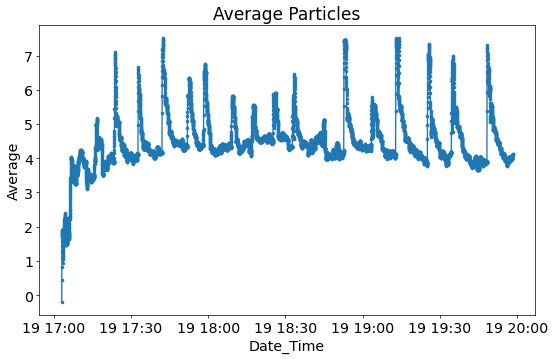

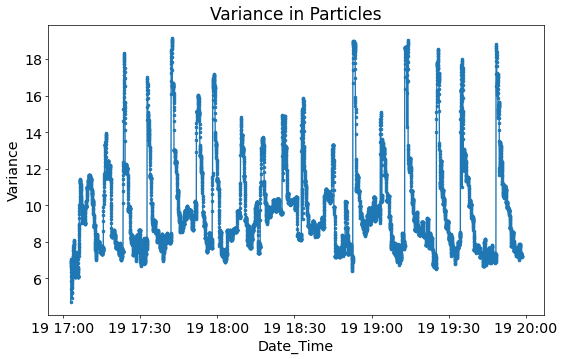

In [30]:
split = len(mergedData)

fig = plt.figure(0, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Average'][:split])/np.log(3),'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Average')
plt.title('Average Particles')

fig = plt.figure(2, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Variance'])[:split],'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Variance')
plt.title('Variance in Particles')

# fig = plt.figure(1, figsize=(10,6), dpi=64)
# ax = fig.gca()
# ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Average'][split:])/np.log(3),'.-')
# ax.set_xlabel(mergedData.columns[0])
# ax.set_ylabel('Average')
# plt.title('Average Particles')

# fig = plt.figure(4, figsize=(10,6), dpi=64)
# ax = fig.gca()
# ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Variance'])[split:],'.-')
# ax.set_xlabel(mergedData.columns[0])
# ax.set_ylabel('Variance')
# plt.title('Variance in Particles')

In [31]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

color = tableau20

### All Sensors Plotted

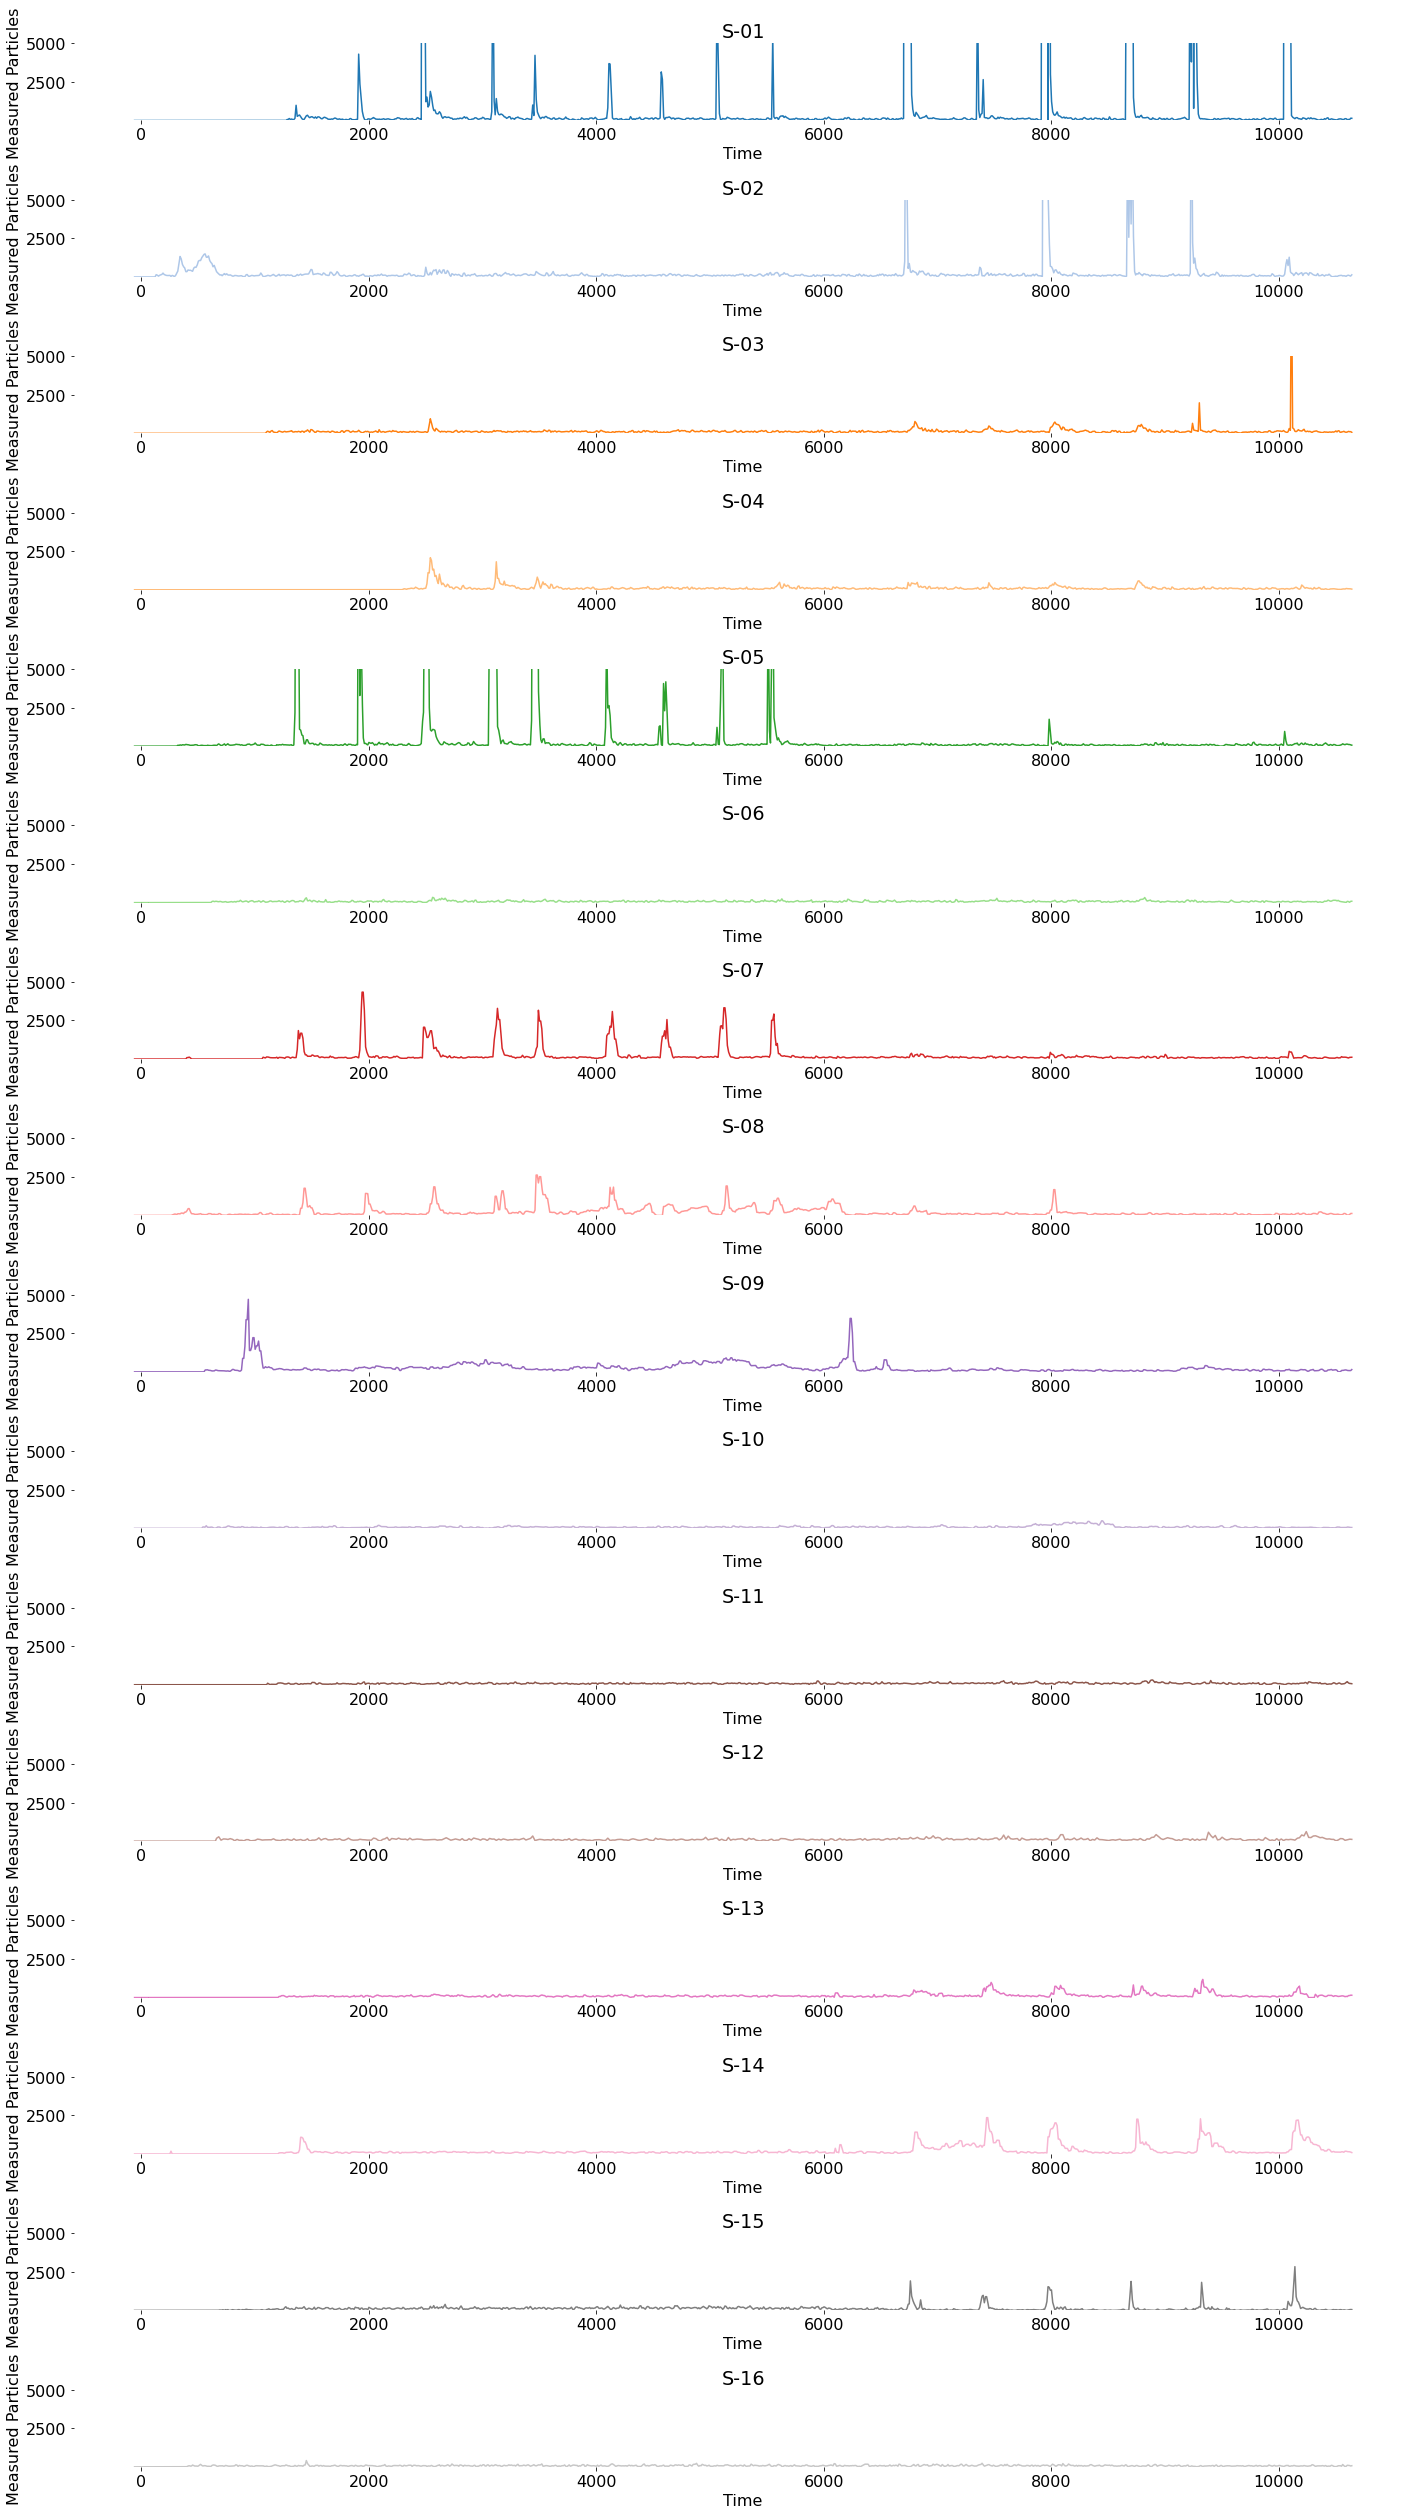

In [32]:

fig,sPlt=plt.subplots(16,sharex=False,sharey=False,figsize=(20,35))
# fig.delaxes(sPlt[1,1])
DataFrame = mergedData

for idx,sensor in enumerate(DataFrame.columns[1:17]):
    yData = (DataFrame[sensor])
    xData = [i for i in range(-60,len(yData)-60)]

    sPlt[idx].plot(xData,yData,color = color[idx],label = sensor)

    sPlt[idx].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[idx].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[idx].set(title=sensor,xlabel='Time',ylabel='Measured Particles')



for ax in sPlt:
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 
    # ax.legend(prop={'size':9})
    ax.set_ylim([1,5000])
    # ax.set_yscale("log")

    
    
plt.tight_layout()
plt.rcParams.update({'font.size':16})


### Zones Plotted Showing Sensor

In [33]:
ZoneAssignments = pd.read_csv('./dataInfo/ZoneAssignments.csv')

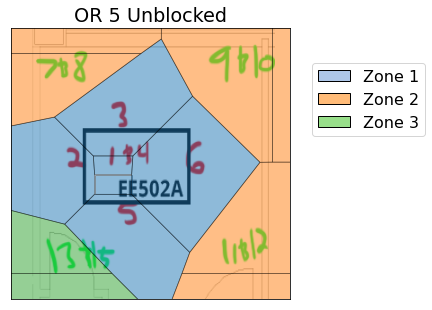

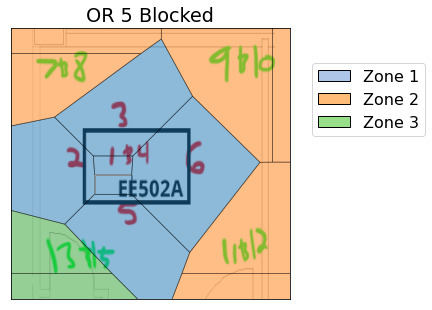

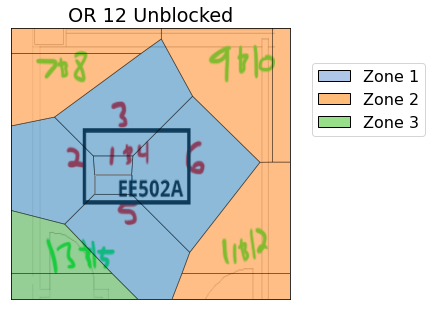

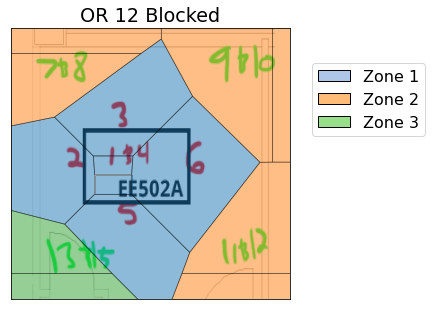

In [34]:
# ZoneAssignments.keys()
ISC = InteriorSensors
# fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(10,10))
for iteration,key in enumerate(ZoneAssignments.keys()):
    x=[]
    y=[]
    points = []
    for idx,sensor in enumerate(InteriorSensors):
        points.append(ISC[sensor])
    vor = Voronoi(points)
    regions, vertices = voronoi_finite_polygons_2d(vor)
    polygons = []
    for reg in regions:
        polygon = vertices[reg]
        polygons.append(polygon)

    plt.figure(figsize=(5,5))

    route = './Graphs,Images,Etc/ICU1.png'
    img = mpimg.imread(route)
    plt.imshow(img, aspect='auto', extent=(0,10,0,11), alpha=1, zorder=-1)
    ax = plt.subplot(111)

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    ax.axis("equal")

    # Set limits
    ax.set_xlim(0,10)
    ax.set_ylim(0,11)

    # Add polygons 
    for idx,poly in enumerate(polygons):
        colored_cell = Polygon(poly,linewidth=0.7, alpha=0.5,facecolor=color[ZoneAssignments[key][idx]*2],edgecolor="black")
        ax.add_patch(colored_cell)
    plt.title(key)
    # got lazy here and explicitly defined the zones
    legend_elements = [Patch(facecolor=color[1], edgecolor='black',label='Zone 1'),
                       Patch(facecolor=color[3], edgecolor='black',label='Zone 2'),
                       Patch(facecolor=color[5], edgecolor='black',label='Zone 3'),]
                       #Patch(facecolor=color[7], edgecolor='black',label='Zone 4'),]
    plt.legend(handles = legend_elements,bbox_to_anchor=(1.05, .9))
    plt.show()
    # voronoi_plot_2d(vor)
        # sPlt[iteration%2][0 if iteration < 2 else 1].plot(X,Y,'o',color = C,mew = 10)


    


In [35]:
stExpDf.keys()
[list(ZoneAssignments[key]).count(x) for x in set(ZoneAssignments[key])]

[6, 6, 6]

ZoneGuide = ZoneAssignments
ZoneGuide['Sensors'] = sensors

In [36]:
[i for i,s in enumerate(stExpDf.keys()) if key in s]

[0, 1, 2]

## Plots of Avg Zone reading with Avg sensor reading

In [37]:
zoneTracker={}
for key in ZoneAssignments:
    for idx,zone in enumerate(ZoneAssignments[key]):
        print(sensors[idx],zone)

NameError: name 'sensors' is not defined

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


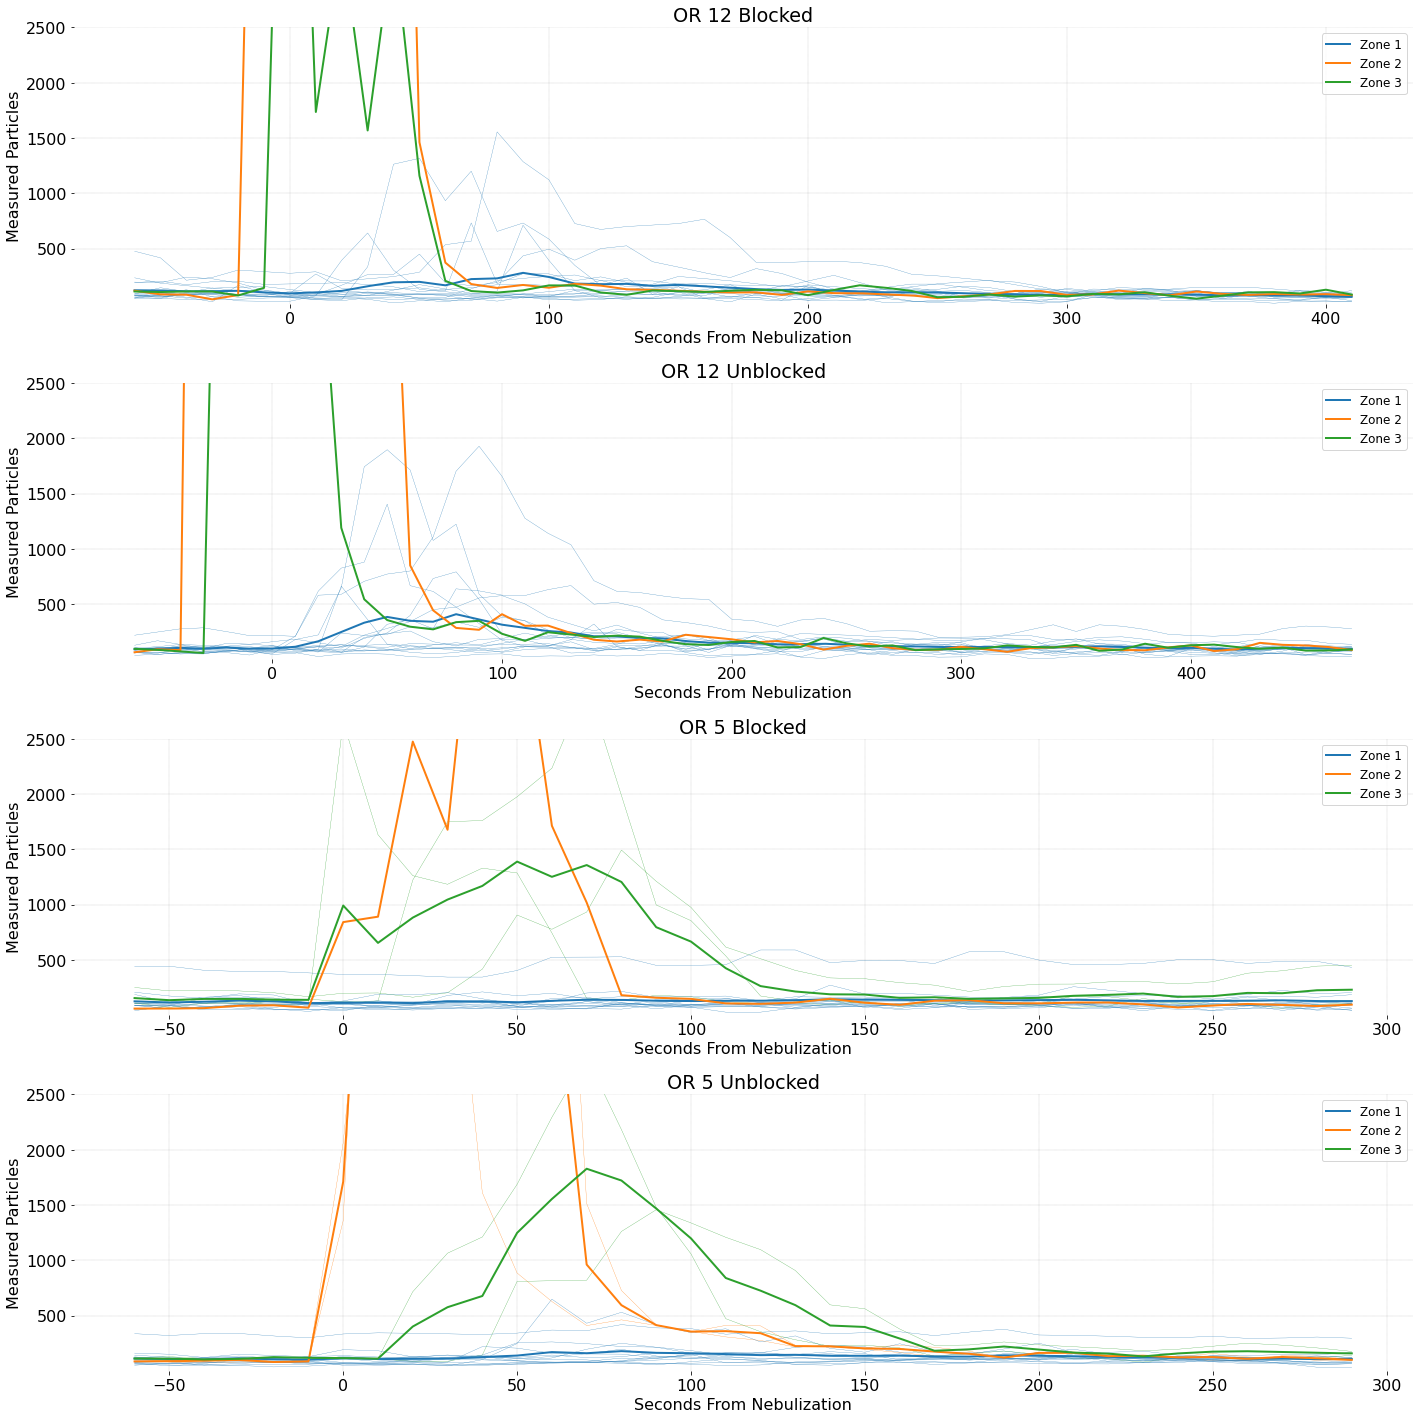

In [48]:

size = len(stAvgDf)
fig,sPlt=plt.subplots(size,sharex=False,sharey=False,figsize=(20,5*size))
numZones = 3
zones = ['Zone '+str(i+1) for i in range(numZones)]
for iteration,key in enumerate(stAvgDf):
    # fig.delaxes(sPlt[1,1])

    DataFrame = stAvgDf[key]
    sensors = list(DataFrame.keys())


    for idx,zone in enumerate(ZoneAssignments[key]):

        yData = DataFrame[sensors[idx]]
        xData = [i for i in range(-60,len(yData)-60)]

        sPlt[iteration].plot(xData,yData,color = color[zone*2],linewidth = .25)
        sPlt[iteration].set(title=key,xlabel='Seconds From Nebulization',ylabel='Measured Particles')

    for idx in range(numZones):
        # sPlt[i].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
        # sPlt[i].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
        
        yData = DataFrame[zones[idx]]
        xData = [i for i in range(-60,len(yData)-60)]
        sPlt[iteration].plot(xData,yData,color = color[idx*2],label = zones[idx],linewidth=2)
        sPlt[iteration].grid(color='black', linestyle='--', linewidth=.1)



    for ax in sPlt:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(prop={'size':12})
        # ax.legend(loc="upper right")
        ax.set_ylim([1,2500])
        # ax.set_xlim([pd.Timestamp(startTime),pd.Timestamp(endTime)])
        # ax.set_yscale("log")

        
        
plt.tight_layout()
plt.rcParams.update({'font.size':16})
    # break


## Plots of Avg Zone Reading With individual Sensor readings

In [39]:
np.var(zoneFrame[key][idx],axis = 1)**.5

0       54.392095
1       51.607807
2       49.181261
3       47.167699
4       45.621839
          ...    
946     90.574431
947     93.404751
948     96.541947
949     99.957128
950    103.622814
Length: 951, dtype: float64

In [34]:
for key in zoneFrame.keys():
    for zone in zoneFrame[key]:
        print(zoneFrame[key][zone].keys())
        break

Index(['S-03 Exp 1', 'S-03 Exp 2', 'S-03 Exp 3', 'S-04 Exp 1', 'S-04 Exp 2',
       'S-04 Exp 3', 'S-05 Exp 1', 'S-05 Exp 2', 'S-05 Exp 3', 'S-06 Exp 1',
       'S-06 Exp 2', 'S-06 Exp 3', 'S-07 Exp 1', 'S-07 Exp 2', 'S-07 Exp 3',
       'S-08 Exp 1', 'S-08 Exp 2', 'S-08 Exp 3', 'S-09 Exp 1', 'S-09 Exp 2',
       'S-09 Exp 3', 'S-10 Exp 1', 'S-10 Exp 2', 'S-10 Exp 3', 'S-11 Exp 1',
       'S-11 Exp 2', 'S-11 Exp 3', 'S-12 Exp 1', 'S-12 Exp 2', 'S-12 Exp 3',
       'S-13 Exp 1', 'S-13 Exp 2', 'S-13 Exp 3', 'S-14 Exp 1', 'S-14 Exp 2',
       'S-14 Exp 3', 'S-15 Exp 1', 'S-15 Exp 2', 'S-15 Exp 3', 'S-16 Exp 1',
       'S-16 Exp 2', 'S-16 Exp 3', 'S-18 Exp 1', 'S-18 Exp 2', 'S-18 Exp 3',
       'S-19 Exp 1', 'S-19 Exp 2', 'S-19 Exp 3'],
      dtype='object')
Index(['S-03 Exp 1', 'S-03 Exp 2', 'S-03 Exp 3', 'S-04 Exp 1', 'S-04 Exp 2',
       'S-04 Exp 3', 'S-05 Exp 1', 'S-05 Exp 2', 'S-05 Exp 3', 'S-06 Exp 1',
       'S-06 Exp 2', 'S-06 Exp 3', 'S-07 Exp 1', 'S-07 Exp 2', 'S-07 Exp 3',
    

<AxesSubplot:>

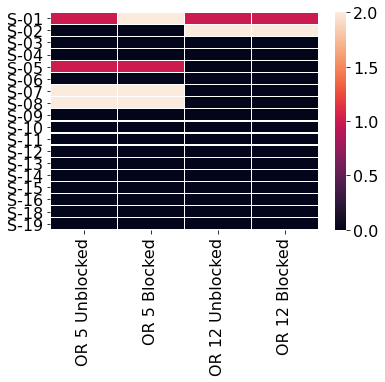

In [57]:
sns.heatmap(ZoneAssignments,yticklabels = sensors[:-5],label='x-small',linecolor='white',linewidths=.25)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\RobertRochlin\anaconda3\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\RobertRochlin\anaconda3\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\RobertRochlin\anaconda3\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\RobertRochlin\anaconda3\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, 

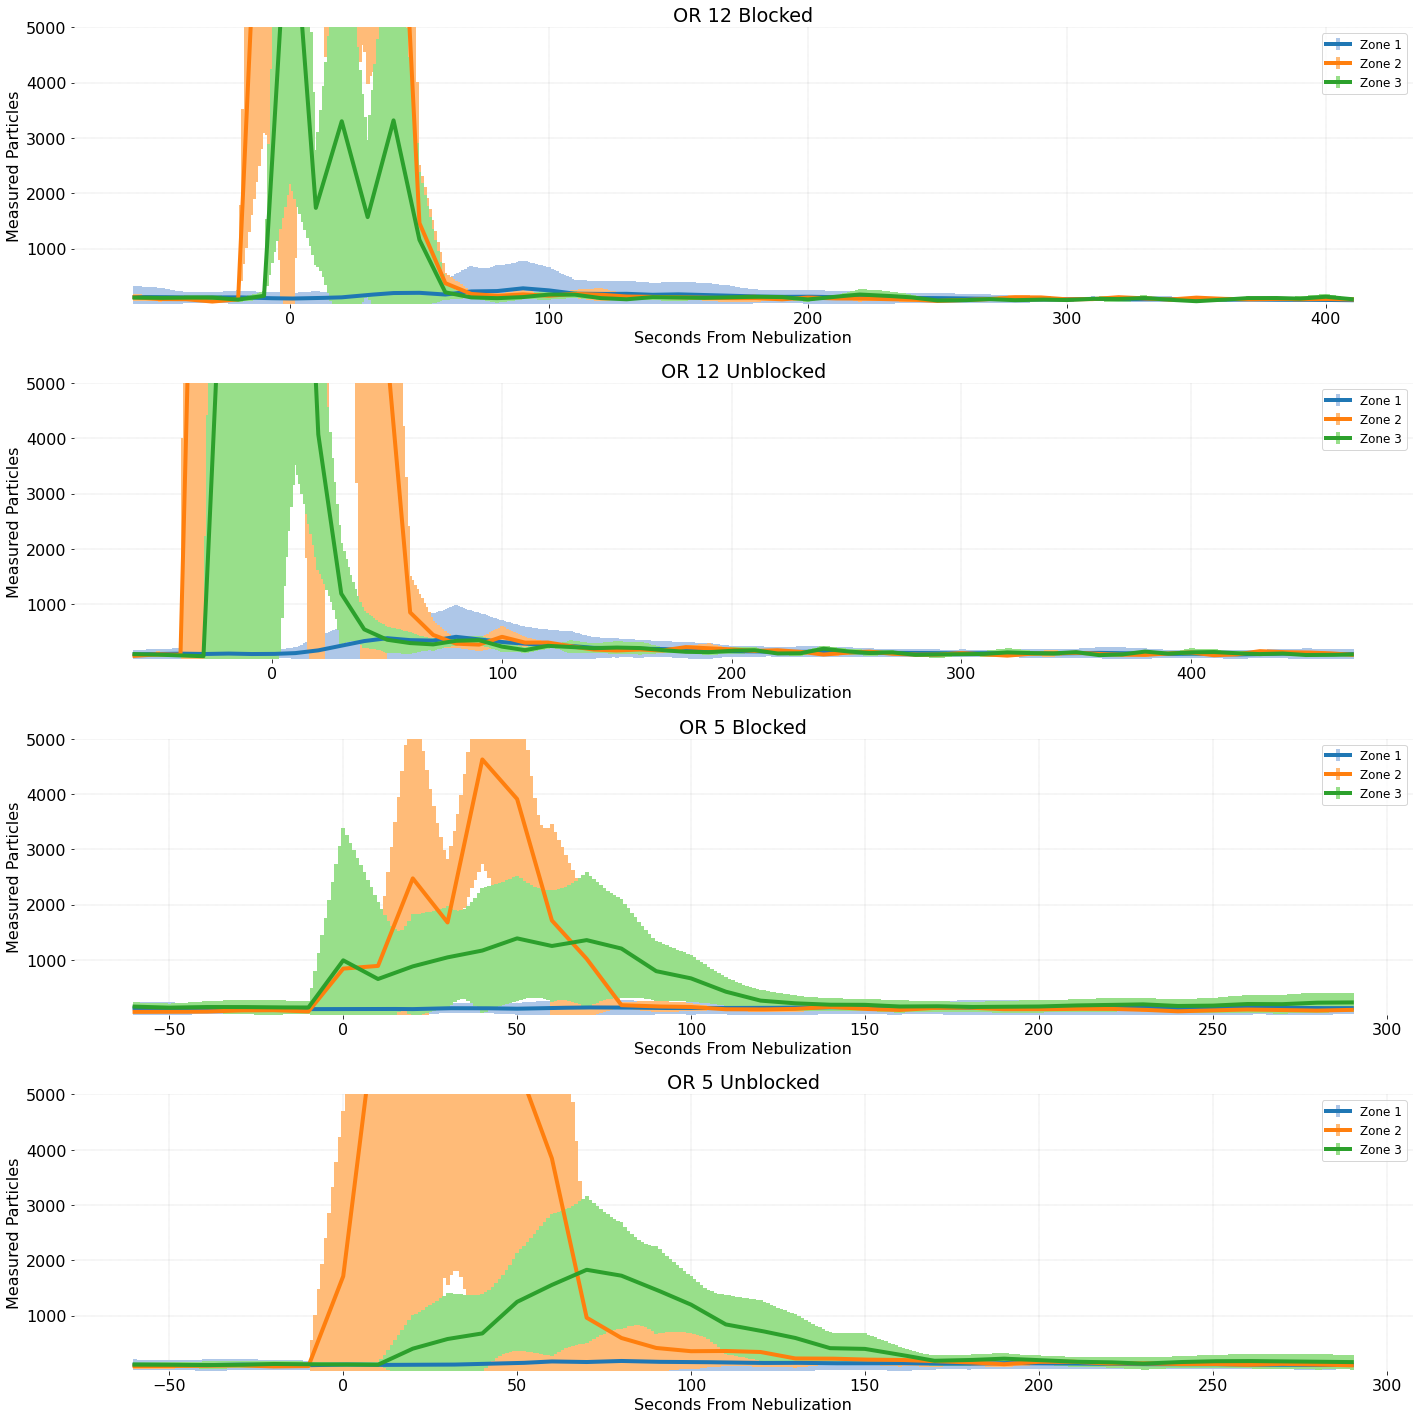

In [23]:

size = len(stAvgDf)
fig,sPlt=plt.subplots(size,sharex=False,sharey=False,figsize=(20,5*size))
numZones = 3
zones = ['Zone '+str(i+1) for i in range(numZones)]
zoneFrame = {}
for iteration,key in enumerate(stAvgDf):
    # fig.delaxes(sPlt[1,1])

    DataFrame = stAvgDf[key]
    sensors = list(DataFrame.keys())[:(-2-numZones)]
    numExps = len([i for i,s in enumerate(stExpDf.keys()) if key in s])
    zoneFrame[key] = {}
    for zone in range(numZones):
        zoneFrame[key][zone] = pd.DataFrame()

    for idx,zone in enumerate(ZoneAssignments[key]):
        for i in range(numExps):
            # print(idx)
            yData = stExpDf[key + ' Exp '+str(i+1)][sensors[idx]]
            zoneFrame[key][zone][sensors[idx] + ' Exp ' + str(i+1)] = yData


    for idx in range(numZones):
        # sPlt[i].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
        # sPlt[i].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 

        yData = DataFrame[zones[idx]]
        yError = np.var(zoneFrame[key][idx],axis = 1)**.5
        xData = [i for i in range(-60,len(yData)-60)]
        sPlt[iteration].errorbar(xData,yData,yerr=yError,ecolor = color[idx*2+1],color = color[idx*2],label = zones[idx],linewidth=4)

    sPlt[iteration].grid(color='black', linestyle='--', linewidth=.1)
    sPlt[iteration].set(title=key,xlabel='Seconds From Nebulization',ylabel='Measured Particles')


    for ax in sPlt:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(prop={'size':12})
        # ax.legend(loc="upper right")
        ax.set_ylim([1,5000])
        # ax.set_xlim([pd.Timestamp(startTime),pd.Timestamp(endTime)])
        ax.set_yscale("log")
    # break
        
        
plt.tight_layout()
plt.rcParams.update({'font.size':16})
    # break
mpld3.save_html(fig,'ZonedVariances.html')



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


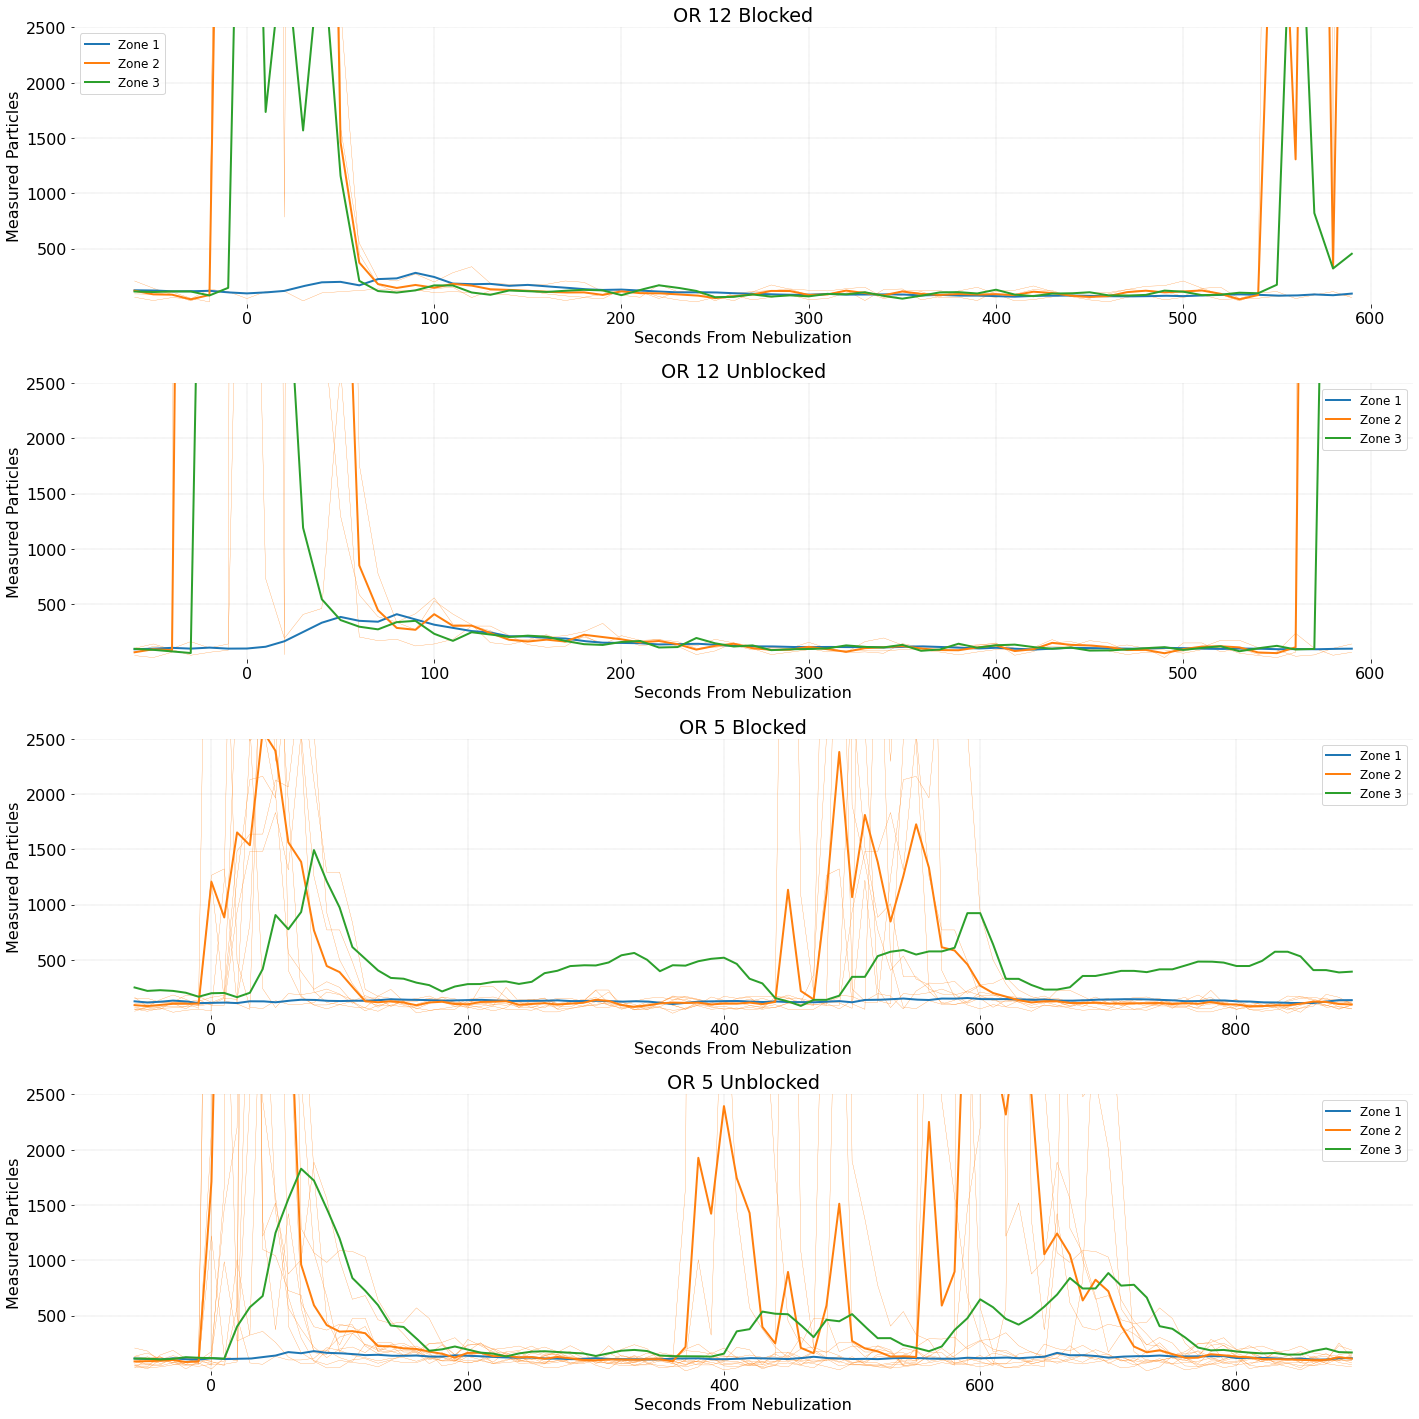

In [41]:

size = len(stAvgDf)
fig,sPlt=plt.subplots(size,sharex=False,sharey=False,figsize=(20,5*size))
numZones = 3
zones = ['Zone '+str(i+1) for i in range(numZones)]
for iteration,key in enumerate(stAvgDf):
    # fig.delaxes(sPlt[1,1])

    DataFrame = stAvgDf[key]
    sensors = list(DataFrame.keys())
    numExps = len([i for i,s in enumerate(stExpDf.keys()) if key in s])

    for idx,zone in enumerate(ZoneAssignments[key]):
        if (zone == 0) or (zone == 2):
            continue
        for i in range(numExps):
            yData = stExpDf[key + ' Exp '+str(i+1)][sensors[idx]]
            xData = [i for i in range(-60,len(yData)-60)]

            sPlt[iteration].plot(xData,yData,color = color[zone*2],linewidth = .25)

    for idx in range(numZones):
        # sPlt[i].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
        # sPlt[i].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
        
        yData = DataFrame[zones[idx]]
        xData = [i for i in range(-60,len(yData)-60)]
        sPlt[iteration].plot(xData,yData,color = color[idx*2],label = zones[idx],linewidth=2)

    sPlt[iteration].grid(color='black', linestyle='--', linewidth=.1)
    sPlt[iteration].set(title=key,xlabel='Seconds From Nebulization',ylabel='Measured Particles')


    for ax in sPlt:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(prop={'size':12})
        # ax.legend(loc="upper right")
        ax.set_ylim([1,2500])
        # ax.set_xlim([pd.Timestamp(startTime),pd.Timestamp(endTime)])
        # ax.set_yscale("log")
    # break
        
        
plt.tight_layout()
plt.rcParams.update({'font.size':16})
    # break


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


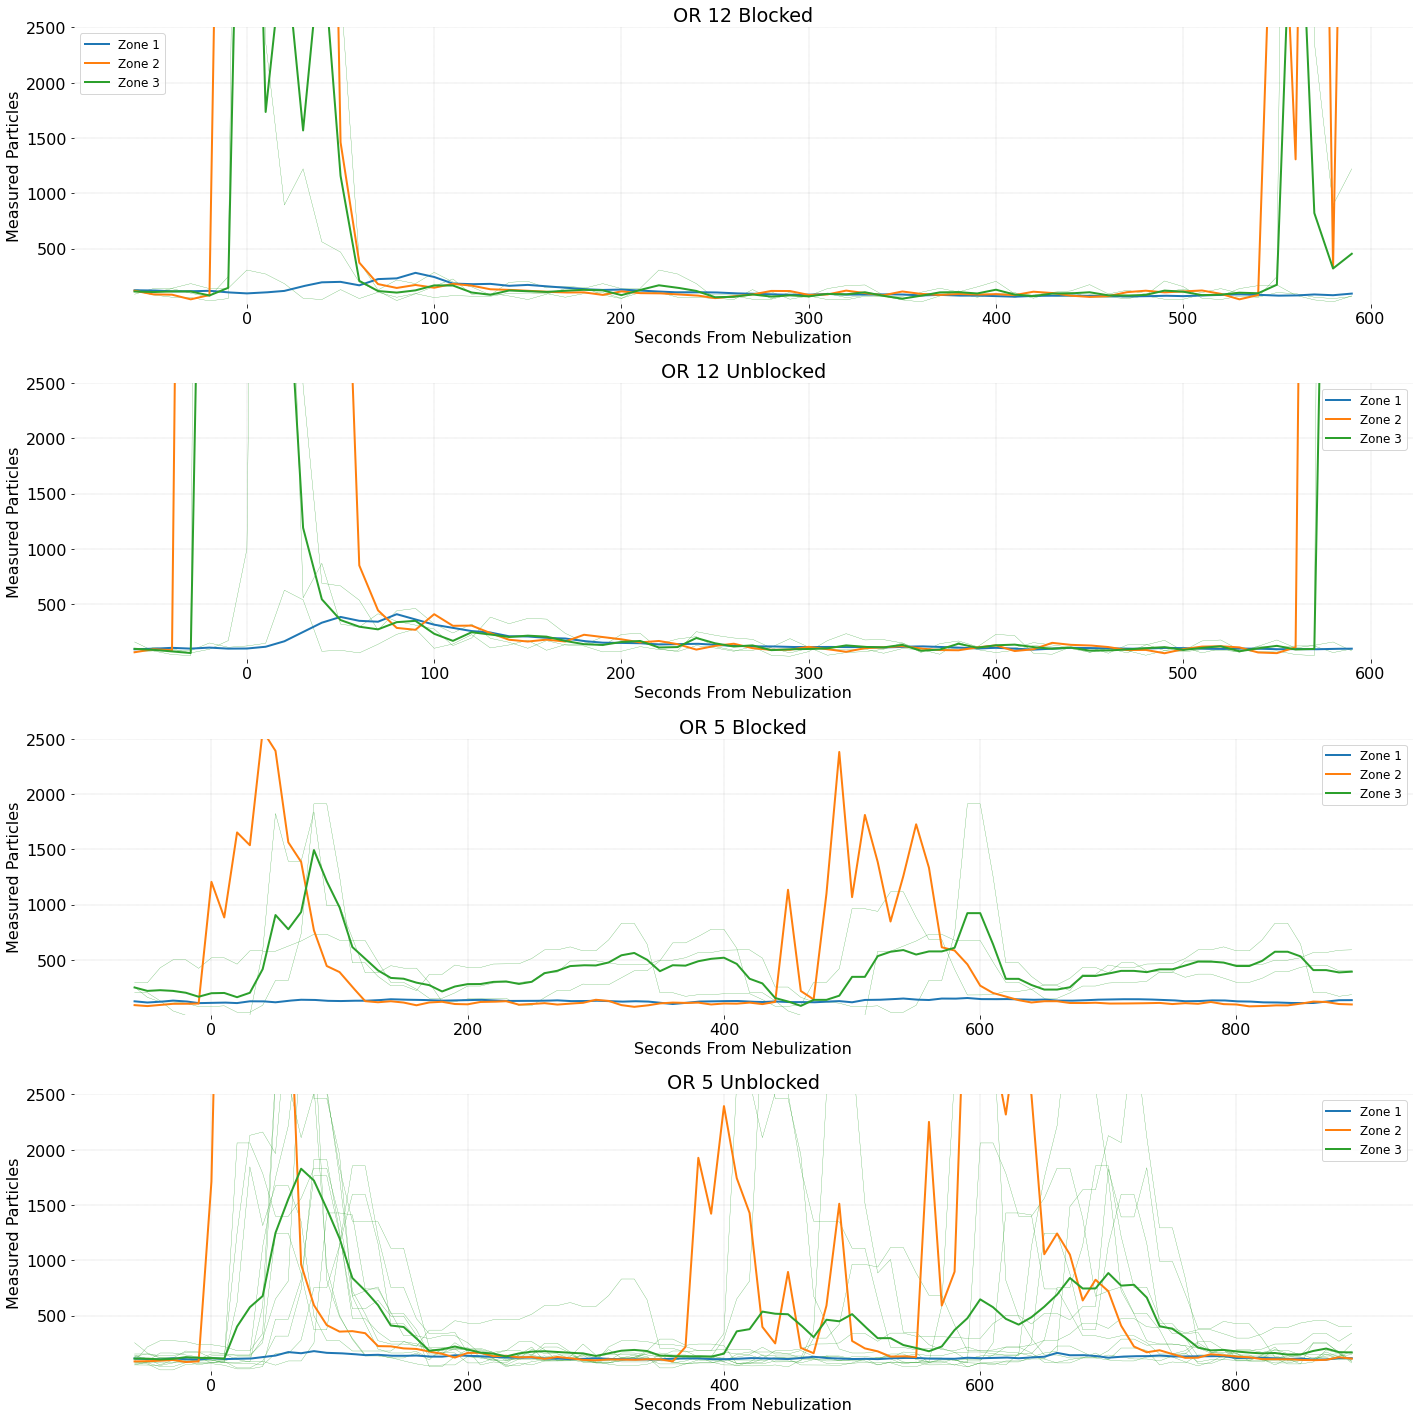

In [42]:

size = len(stAvgDf)
fig,sPlt=plt.subplots(size,sharex=False,sharey=False,figsize=(20,5*size))
numZones = 3
zones = ['Zone '+str(i+1) for i in range(numZones)]
for iteration,key in enumerate(stAvgDf):
    # fig.delaxes(sPlt[1,1])

    DataFrame = stAvgDf[key]
    sensors = list(DataFrame.keys())
    numExps = len([i for i,s in enumerate(stExpDf.keys()) if key in s])

    for idx,zone in enumerate(ZoneAssignments[key]):
        if (zone == 0) or (zone == 1):
            continue
        for i in range(numExps):
            yData = stExpDf[key + ' Exp '+str(i+1)][sensors[idx]]
            xData = [i for i in range(-60,len(yData)-60)]

            sPlt[iteration].plot(xData,yData,color = color[zone*2],linewidth = .25)

    for idx in range(numZones):
        # sPlt[i].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
        # sPlt[i].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
        
        yData = DataFrame[zones[idx]]
        xData = [i for i in range(-60,len(yData)-60)]
        sPlt[iteration].plot(xData,yData,color = color[idx*2],label = zones[idx],linewidth=2)

    sPlt[iteration].grid(color='black', linestyle='--', linewidth=.1)
    sPlt[iteration].set(title=key,xlabel='Seconds From Nebulization',ylabel='Measured Particles')


    for ax in sPlt:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(prop={'size':12})
        # ax.legend(loc="upper right")
        ax.set_ylim([1,2500])
        # ax.set_xlim([pd.Timestamp(startTime),pd.Timestamp(endTime)])
        # ax.set_yscale("log")
    # break
        
        
plt.tight_layout()
plt.rcParams.update({'font.size':16})
    # break


In [43]:
indexList = {}
thresh = 1.5
for notUse,x in enumerate(stAvgDf):
    switch = 1
    for idx,i in enumerate(np.log(stAvgDf[x]['Average'])/np.log(10)):
        if i <= thresh:
            if not switch:
                indexList[x] = idx-120
                switch = 1
                # print(stAvgDf[x]['Average'][idx])
        else:
            switch = 0
    if not switch:
        indexList[x] = idx-120
    print(indexList[x],'seconds',x)

530 seconds OR 12 Blocked
530 seconds OR 12 Unblocked
830 seconds OR 5 Blocked
830 seconds OR 5 Unblocked


In [44]:
for idx,x in enumerate(stAvgDf):
    if re.match("OR7",x):
        continue
    fig = plt.figure(0, figsize=(10,7.5), dpi=64)
    ax = fig.gca()
    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    ax.plot([i for i in range(-60,len(yData)-60)],yData,'-.',color = color[idx],label = x + ' ' + str(xData) + ' (s)')

    ax.plot([xData+60],[10**thresh],'*',ms=20,color = color[idx])
    # ax.plot([xData,cData],[0,5])

    # ax.plot([i for i in range(-60,len(yData)-60)],yData,'.')
    # ax.plot([xData,xData],[0,200])

# ax.plot([-60,len(yData)-60],[thresh**3,thresh**3],color = 'white')

## plotting lines here
ax.plot([-60,875],[10**thresh]*2,'--',color = 'black')
ax.plot([0,0],[10**4,1],'--',color = 'green')
ax.plot([60,60],[10**4,1],'--',color = 'red')

plt.yscale("log")

plt.ylim([10,10**4])

ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('log of Particle Concentration')
plt.title('Average Particles vs. Time')
ax.spines["top"].set_visible(False)   
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.legend(prop={'size':12})
plt.rcParams.update({'font.size':15})
ax.fill_between([0,60], [1,3], [1,3],facecolor='green',where=True, alpha=0.5)
# #For exporting
# mpld3.save_html(fig,'avgParticlePlot27_Thresh.html')

Error in callback <function flush_figures at 0x000001351EACB1F0> (for post_execute):


KeyboardInterrupt: 

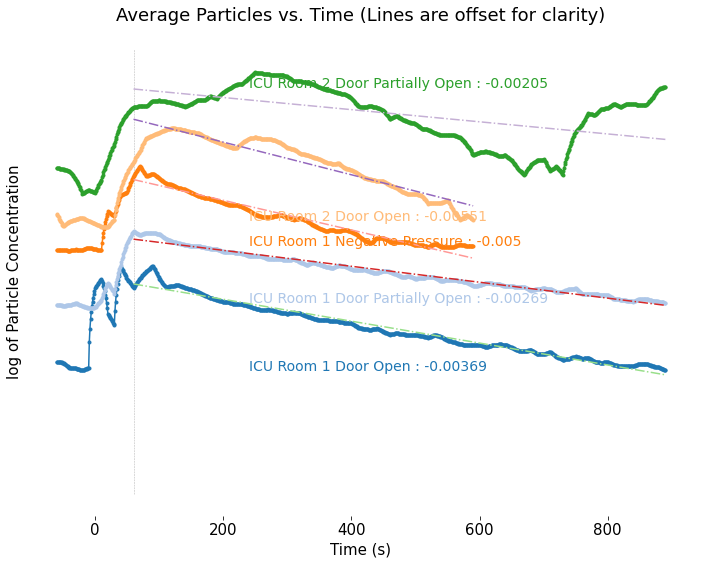

In [500]:
fig = plt.figure(0,figsize=(12,9))
ax = plt.subplot(111)   
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().set_ticks([]) 
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.set_xlabel('Time (s)')
ax.set_ylabel('log of Particle Concentration')
plt.title('Average Particles vs. Time (Lines are offset for clarity)')
plt.plot([60,60], [0,15], "--", lw=0.5, color="black", alpha=0.3)  
spaceFactor = 2

for idx,x in enumerate(stAvgDf):

    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    yPoints = np.log(stAvgDf[x]['Average'][120:])
    xPoints = np.array([i+60 for i in range(len(yPoints))])
    m,b = np.polyfit(xPoints,yPoints,1)
    
    ax.plot([i for i in range(-60,len(yData)-60)],np.log(yData)+idx*spaceFactor,'.-',color = tableau20[idx],label = x + ': Coefficient  ' + str(round(m,3)) )

    ax.plot(xPoints,m*xPoints+b+idx*spaceFactor,'-.',color = tableau20[idx+5])
    y_pos = yPoints.values[-1] + idx*spaceFactor
    plt.text(240, y_pos, x + ' : '+str(round(m,5)), fontsize=14, color=tableau20[idx])    

# # #For Exporting
# mpld3.save_html(fig,'ParticleCountsWithFit.html')


### Plotting Data for Sensors

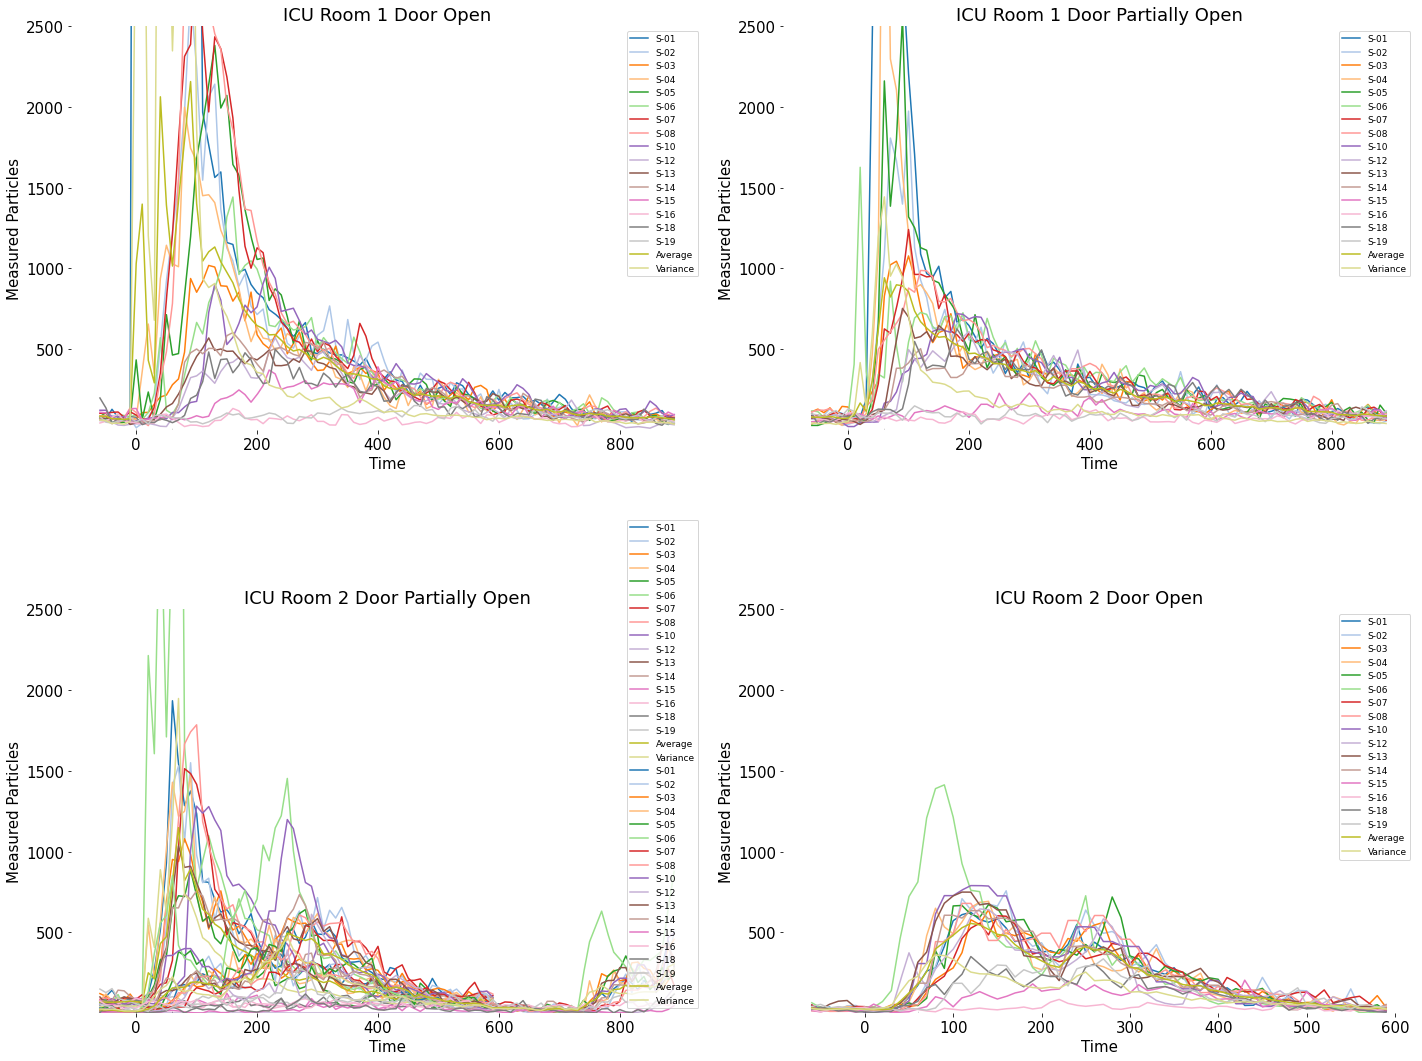

In [501]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))
# fig.delaxes(sPlt[1,1])
DataFrame = stAvgDf
for idx,x in enumerate(DataFrame):
    for loop,zone in enumerate(DataFrame[x].columns[:18]):
        # if zone == 'S-13':
        #     continue
        yData = (DataFrame[x][zone])
        xData = [i for i in range(-60,len(yData)-60)]

        sPlt[1 if idx > 1 else 0][idx%2].plot(xData,yData,color = color[loop],label = zone)

    sPlt[1 if idx > 1 else 0][idx%2].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[1 if idx > 1 else 0][idx%2].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[1 if idx > 1 else 0][idx%2].set(title=x,xlabel='Time',ylabel='Measured Particles')


for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(prop={'size':9})
        ax.set_ylim([1,2500])


plt.tight_layout()
plt.rcParams.update({'font.size':22})


### Plotting Data for Zones

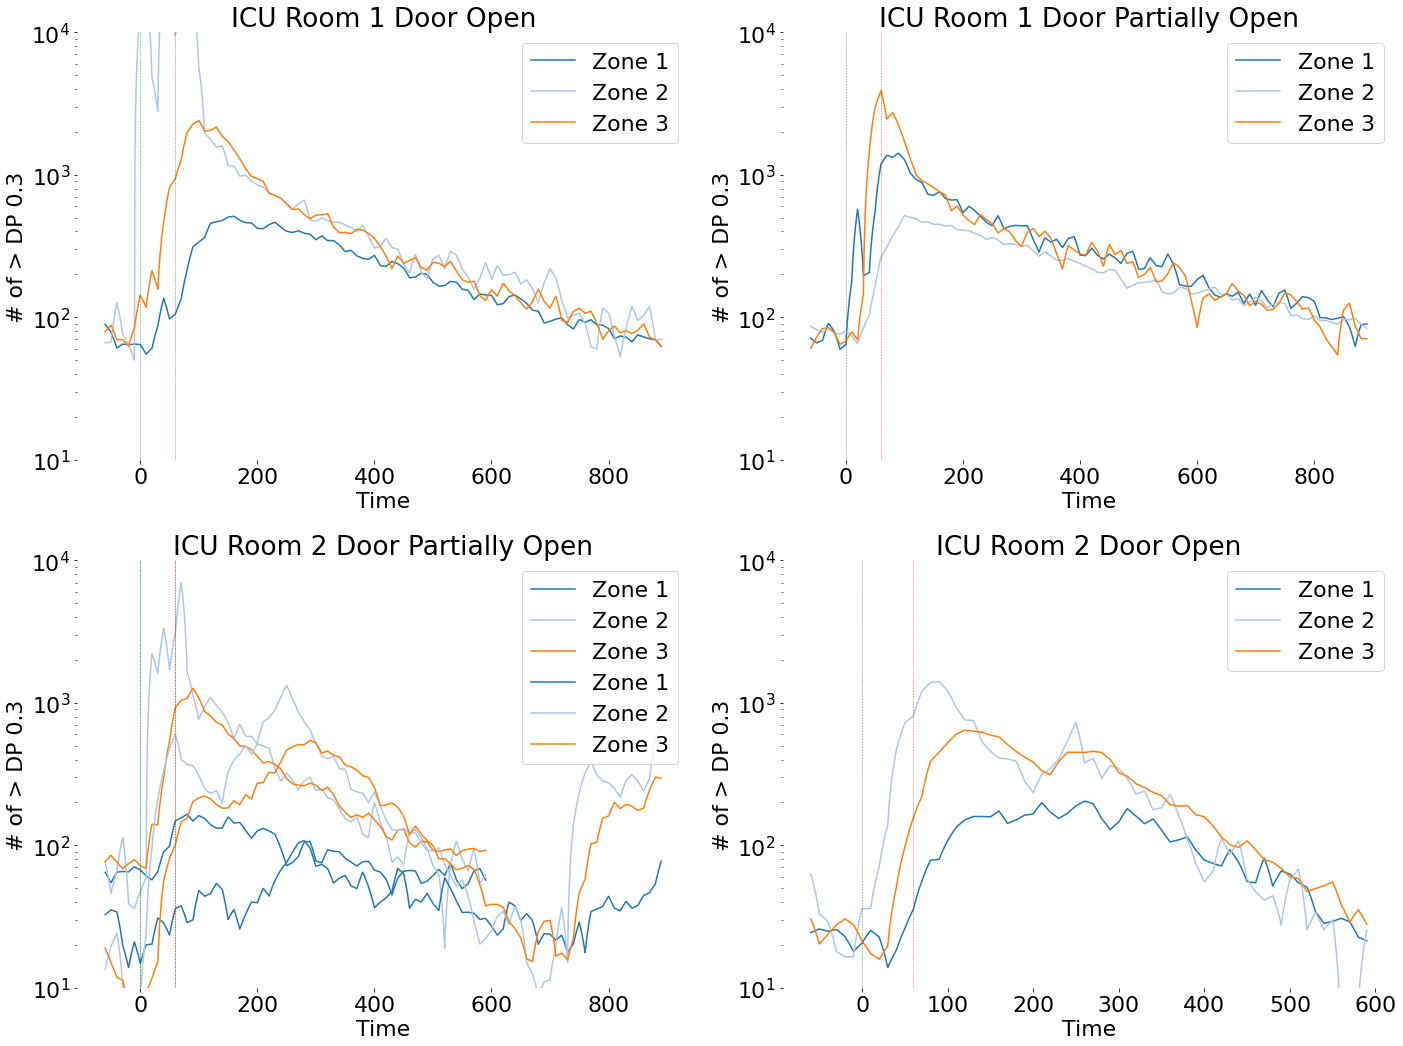

In [502]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))

DataFrame = stAvgDf
for idx,x in enumerate(DataFrame):
    for loop,zone in enumerate(DataFrame[x].columns[18:]):
        # if True: 

        if re.match(r"Zone",zone):

            yData = (DataFrame[x][zone])
            xData = [i for i in range(-60,len(yData)-60)]

            sPlt[1 if idx > 1 else 0][idx%2].plot(xData,yData,color = color[loop],label = zone)
            
    sPlt[1 if idx > 1 else 0][idx%2].plot([60,60], [1,10**4.5], "--", lw=0.5, color="red", alpha=0.75)
    sPlt[1 if idx > 1 else 0][idx%2].plot([0,0], [1,10**4.5], "--", lw=0.5, color="green", alpha=0.75) 
    sPlt[1 if idx > 1 else 0][idx%2].set(title=x,xlabel='Time',ylabel='# of > DP 0.3')


for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend()
        ax.set_yscale('log')
        ax.set_ylim([10,10**4])

# sPlt[0][1].set(title='OR7 Blocked',xlabel='Time',ylabel='Log of Particle concentration')
# sPlt[0][0].set(title='OR16 Blocked 1')
plt.tight_layout()
plt.rcParams.update({'font.size':16})





In [503]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))
xData = [i for i in range(-60,len(yData)-60)]
DataFrame = stExpDf
for idx,x in enumerate(DataFrame):
    yData = (DataFrame[x]['Zone 1'])
    for loop,zone in enumerate(DataFrame[x].columns[18:]):

        if re.match(r"Zone",zone):
            if zone == 'Zone 3':
                sPlt[ls00011[idx]][ls01201[idx]].plot(xData,(yData)/3,color = color[1],label = 'Indoor' + str(x.split()[2]))
                yData = (DataFrame[x][zone])
                sPlt[ls00011[idx]][ls01201[idx]].plot(xData,yData,color = color[2],label = 'Outdoor')
            else:
                yData += (DataFrame[x][zone])


    # yPoints = np.log(stAvgDf[x]['Average'][120:])
    # xPoints = np.array([i+60 for i in range(len(yPoints))])
    # m,b = np.polyfit(xPoints,yPoints,1)
    # sPlt[idx%3][1 if idx > 2 else 0].plot(xPoints,xPoints*m+b,color = color[10])
    sPlt[ls00011[idx]][ls01201[idx]].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[ls00011[idx]][ls01201[idx]].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[ls00011[idx]][ls01201[idx]].set(title=x.split()[0:2],xlabel='Time',ylabel='Measured Particles')

for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(loc="upper right")
        ax.set_ylim([1,10**3.5])
# sPlt[0][1].set(title='OR7 Blocked',xlabel='Time',ylabel='Log of Particle concentration')
# sPlt[0][0].set(title='OR16 Blocked 1')
plt.tight_layout()
plt.rcParams.update({'font.size':16})


NameError: name 'ls00011' is not defined